# Perceptron

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. 

Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss=”perceptron”, eta0=1, learning_rate=”constant”, penalty=None).

In [1]:
# load libraries
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_digits

In [2]:
# set data
X, y = load_digits(return_X_y=True)

In [3]:
# classifier
clf = Perceptron(tol=1e-3, random_state=43)
clf

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=43,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [4]:
# fit data
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=43,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [5]:
# check score
clf.score(X, y)

0.9343350027824151

### Comparing Online Solvers using Perceptron

In [6]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [7]:
# set data
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [8]:
# define classifiers
classifiers = [
    ("SGD", SGDClassifier(max_iter=100)),
    ("ASGD", SGDClassifier(average=True, max_iter=100)),
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


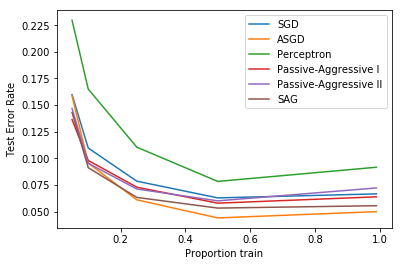

In [9]:
# plot
xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

In [10]:
# comparing perceptron and SGD with loss=perceptron
classifiers = [
    ("Perceptron", Perceptron(tol=1e-3)),
    ("SGD Perceptron", SGDClassifier(loss='perceptron', max_iter=100,
                                     eta0=1, learning_rate='constant', penalty=None))
]

training Perceptron
training SGD Perceptron


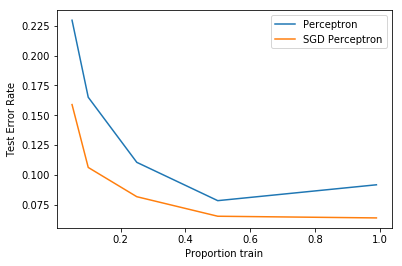

In [11]:
# plot
xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()